In [12]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
pd.options.display.max_rows = 4000
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [13]:
df = pd.read_csv('monthly_count.csv')

crime_M = df
crime_M.rename(columns={'CMPLNT_FR_DT': 'Month'}, inplace = True)
crime_M.set_index('Month', inplace = True)

In [14]:
x_crime = pd.read_csv('final.csv')
x_crime.Month = pd.to_datetime(
    x_crime.Month, errors='coerce', infer_datetime_format = True)
x_crime.set_index('Month', inplace = True)

In [15]:
for col in x_crime.columns:
    x_crime['{}_one_diff'.format(col)] = x_crime[col].diff(periods=1)
    x_crime['{}season_2nd'.format(col)] = x_crime[
        '{}_one_diff'.format(col)].diff(periods=12)
    x_crime['{}_seasonal_1st'.format(col)] = x_crime[col].diff(periods=12)
    x_crime['{}seasonal_diff_one'.format(col)] = x_crime[
        '{}_seasonal_1st'.format(col)].diff(periods=1)

In [16]:
#create a function that will help us to quickly 
def test_stationarity(timeseries, window, name = None):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(20, 8))
    orig = plt.plot(timeseries.iloc[window:], color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    if name != None:
        plt.title('Rolling Mean & Standard Deviation for {}'.format(name))
    else:
        plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

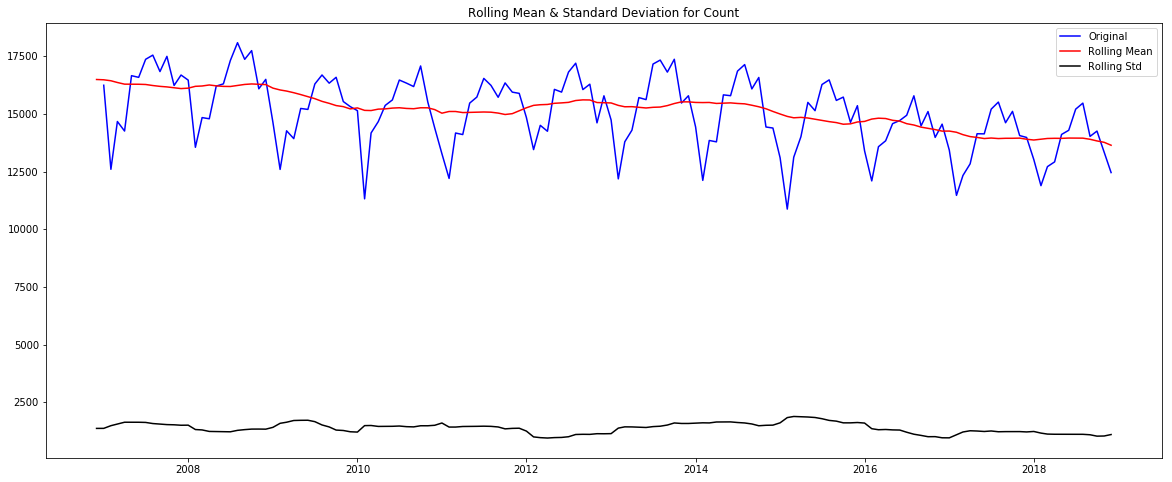

Results of Dickey-Fuller Test:
Test Statistic                  -0.437883
p-value                          0.903579
#Lags Used                      12.000000
Number of Observations Used    143.000000
Critical Value (1%)             -3.476927
Critical Value (5%)             -2.881973
Critical Value (10%)            -2.577665
dtype: float64


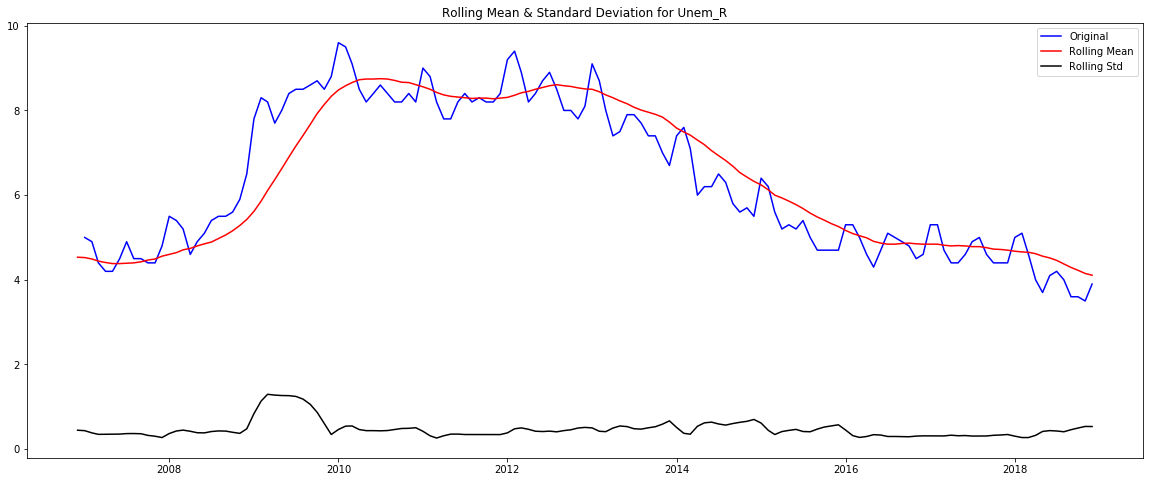

Results of Dickey-Fuller Test:
Test Statistic                  -2.081113
p-value                          0.252177
#Lags Used                      12.000000
Number of Observations Used    143.000000
Critical Value (1%)             -3.476927
Critical Value (5%)             -2.881973
Critical Value (10%)            -2.577665
dtype: float64


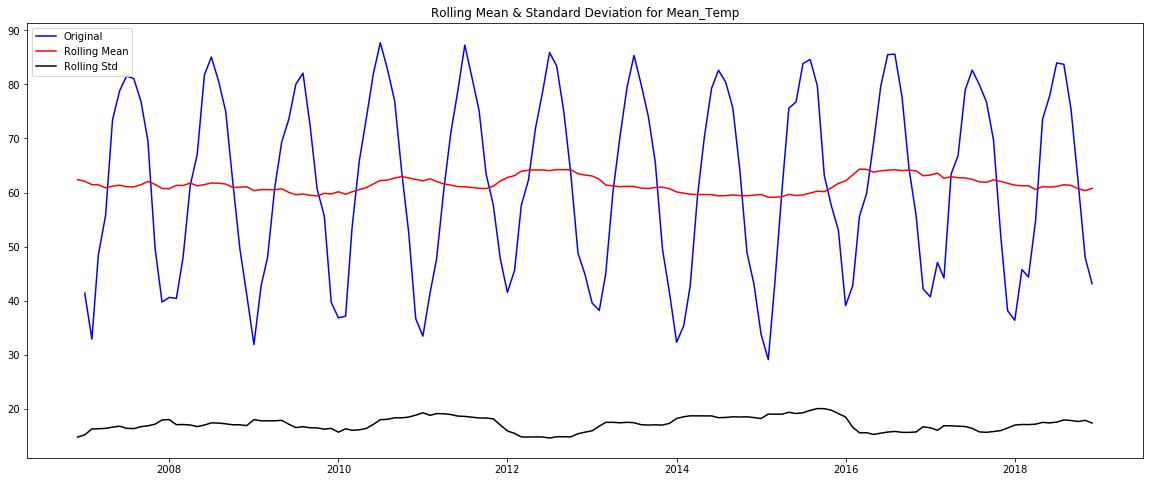

Results of Dickey-Fuller Test:
Test Statistic                  -2.587348
p-value                          0.095640
#Lags Used                      10.000000
Number of Observations Used    145.000000
Critical Value (1%)             -3.476273
Critical Value (5%)             -2.881688
Critical Value (10%)            -2.577513
dtype: float64


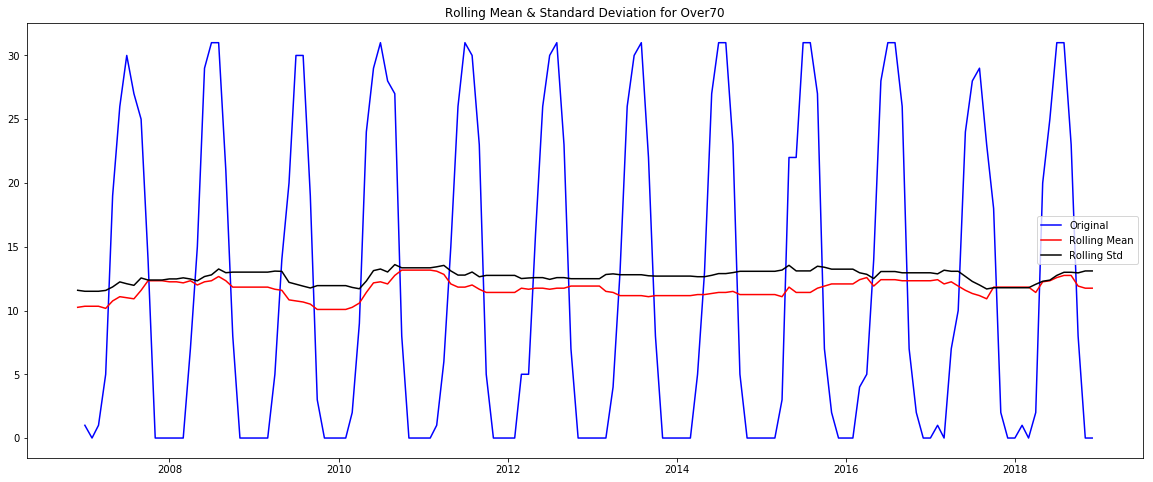

Results of Dickey-Fuller Test:
Test Statistic                  -3.694454
p-value                          0.004192
#Lags Used                      14.000000
Number of Observations Used    141.000000
Critical Value (1%)             -3.477601
Critical Value (5%)             -2.882266
Critical Value (10%)            -2.577822
dtype: float64


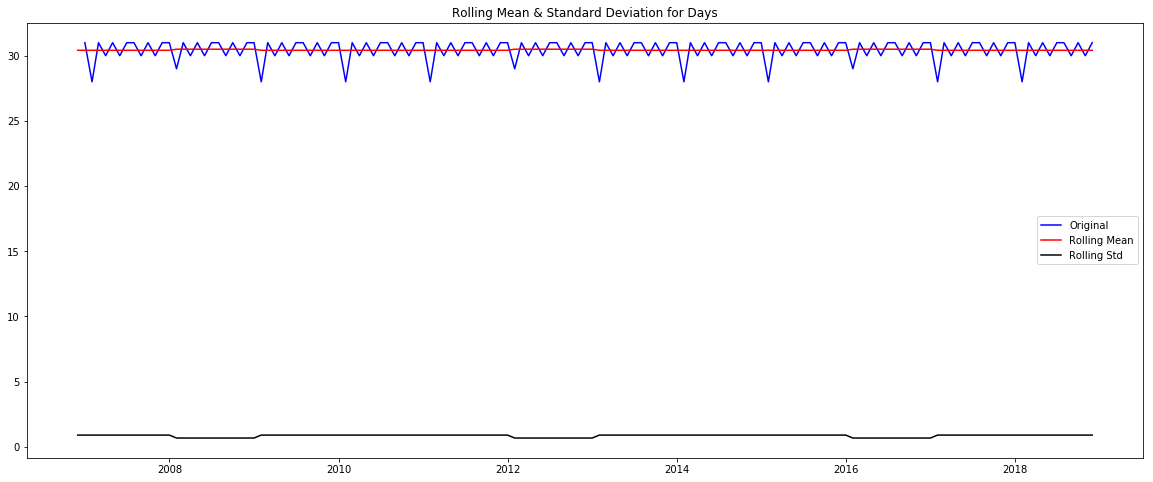

Results of Dickey-Fuller Test:
Test Statistic                  -2.809178
p-value                          0.056975
#Lags Used                      11.000000
Number of Observations Used    144.000000
Critical Value (1%)             -3.476598
Critical Value (5%)             -2.881829
Critical Value (10%)            -2.577589
dtype: float64


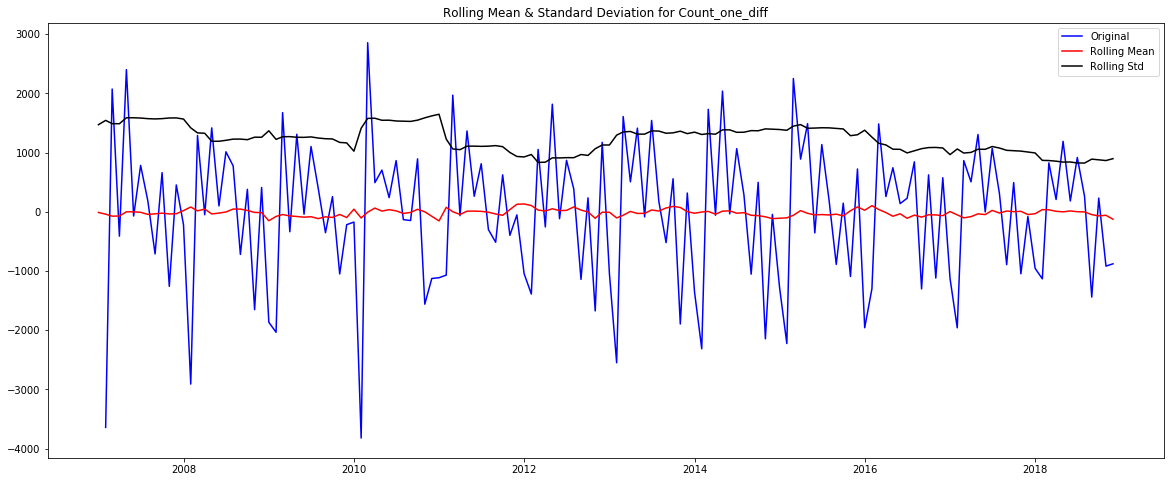

Results of Dickey-Fuller Test:
Test Statistic                -6.031277e+00
p-value                        1.416046e-07
#Lags Used                     1.100000e+01
Number of Observations Used    1.430000e+02
Critical Value (1%)           -3.476927e+00
Critical Value (5%)           -2.881973e+00
Critical Value (10%)          -2.577665e+00
dtype: float64


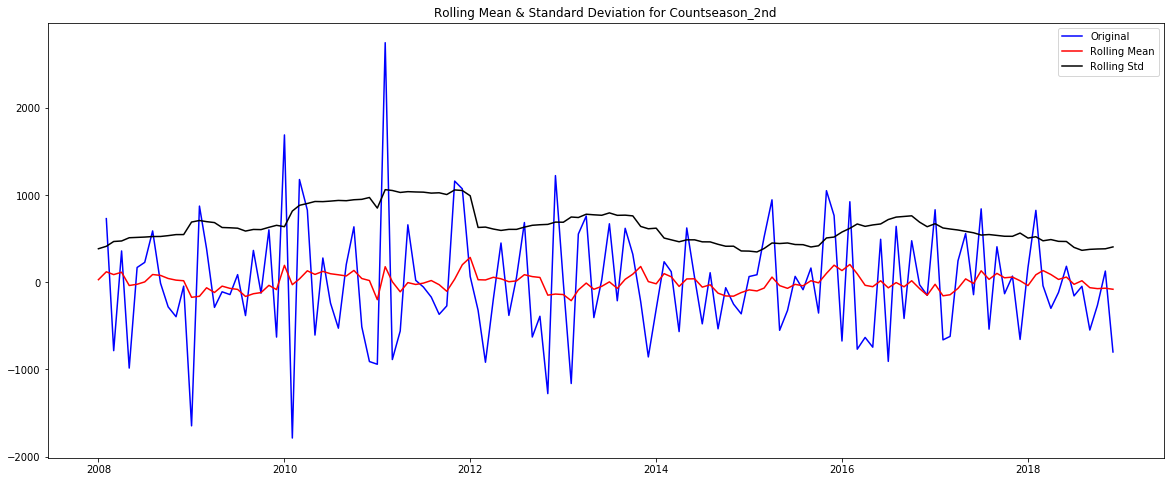

Results of Dickey-Fuller Test:
Test Statistic                  -4.672124
p-value                          0.000095
#Lags Used                      11.000000
Number of Observations Used    131.000000
Critical Value (1%)             -3.481282
Critical Value (5%)             -2.883868
Critical Value (10%)            -2.578677
dtype: float64


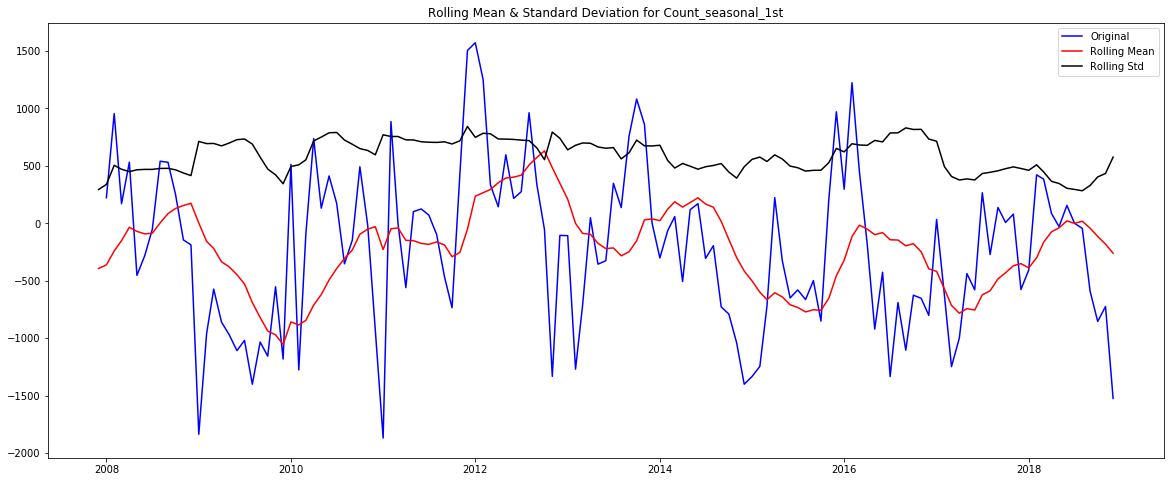

Results of Dickey-Fuller Test:
Test Statistic                  -3.642603
p-value                          0.004997
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


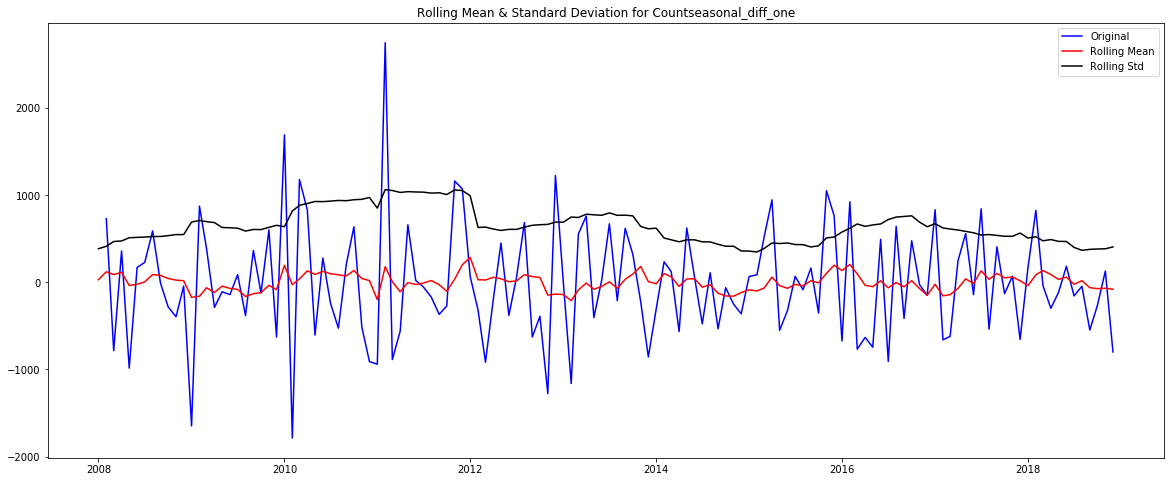

Results of Dickey-Fuller Test:
Test Statistic                  -4.672124
p-value                          0.000095
#Lags Used                      11.000000
Number of Observations Used    131.000000
Critical Value (1%)             -3.481282
Critical Value (5%)             -2.883868
Critical Value (10%)            -2.578677
dtype: float64


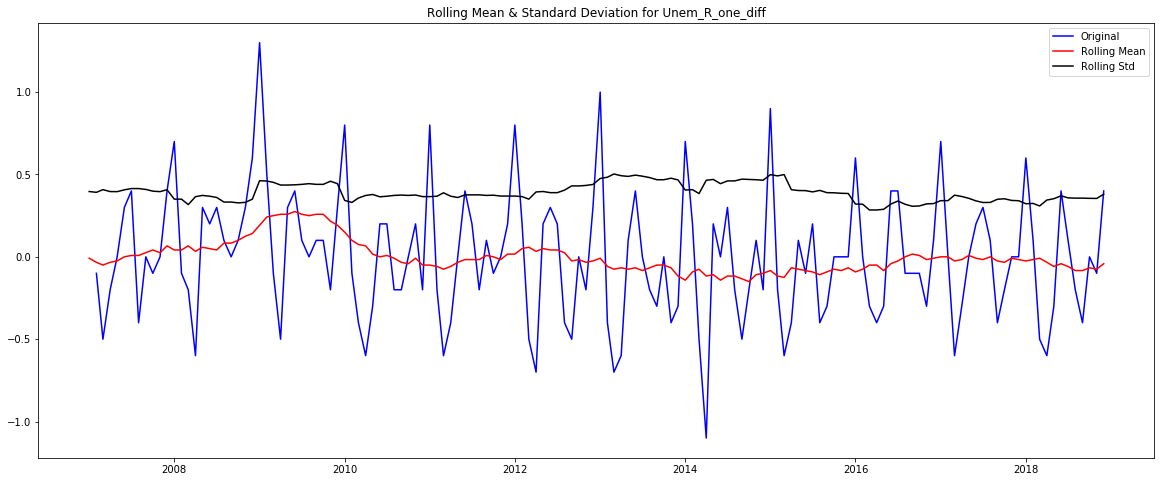

Results of Dickey-Fuller Test:
Test Statistic                  -1.635538
p-value                          0.464593
#Lags Used                      11.000000
Number of Observations Used    143.000000
Critical Value (1%)             -3.476927
Critical Value (5%)             -2.881973
Critical Value (10%)            -2.577665
dtype: float64


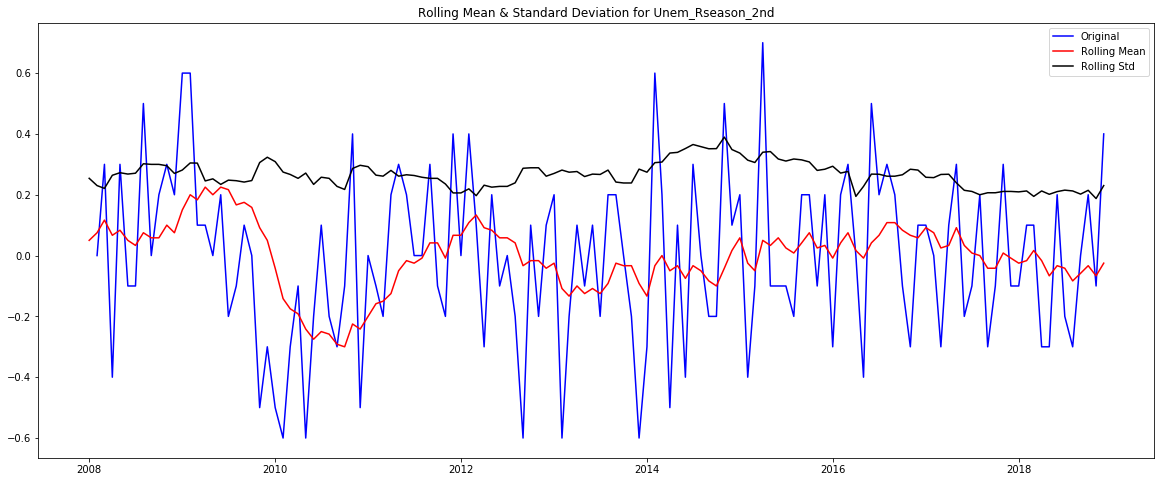

Results of Dickey-Fuller Test:
Test Statistic                  -4.513996
p-value                          0.000186
#Lags Used                      11.000000
Number of Observations Used    131.000000
Critical Value (1%)             -3.481282
Critical Value (5%)             -2.883868
Critical Value (10%)            -2.578677
dtype: float64


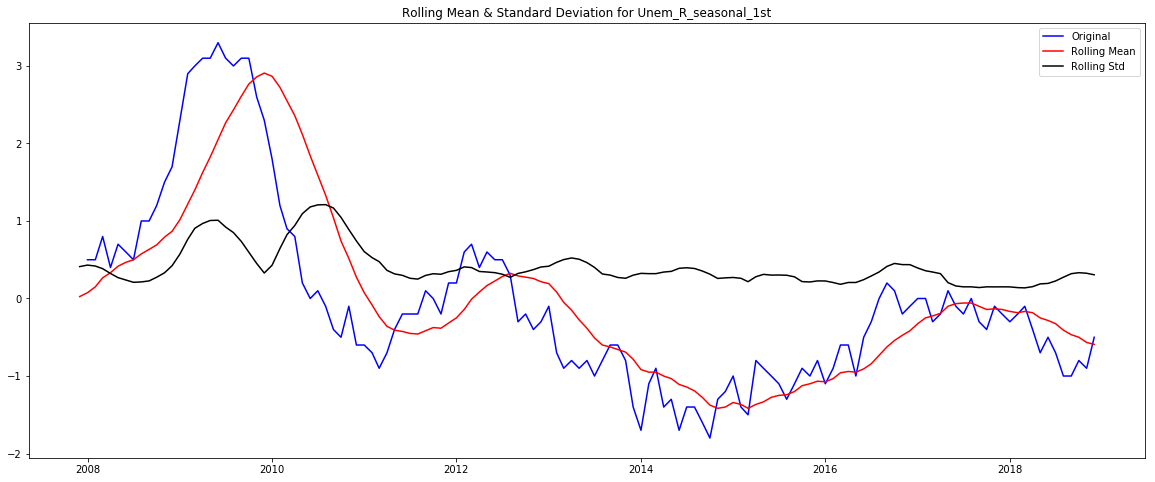

Results of Dickey-Fuller Test:
Test Statistic                  -1.496544
p-value                          0.535220
#Lags Used                      12.000000
Number of Observations Used    131.000000
Critical Value (1%)             -3.481282
Critical Value (5%)             -2.883868
Critical Value (10%)            -2.578677
dtype: float64


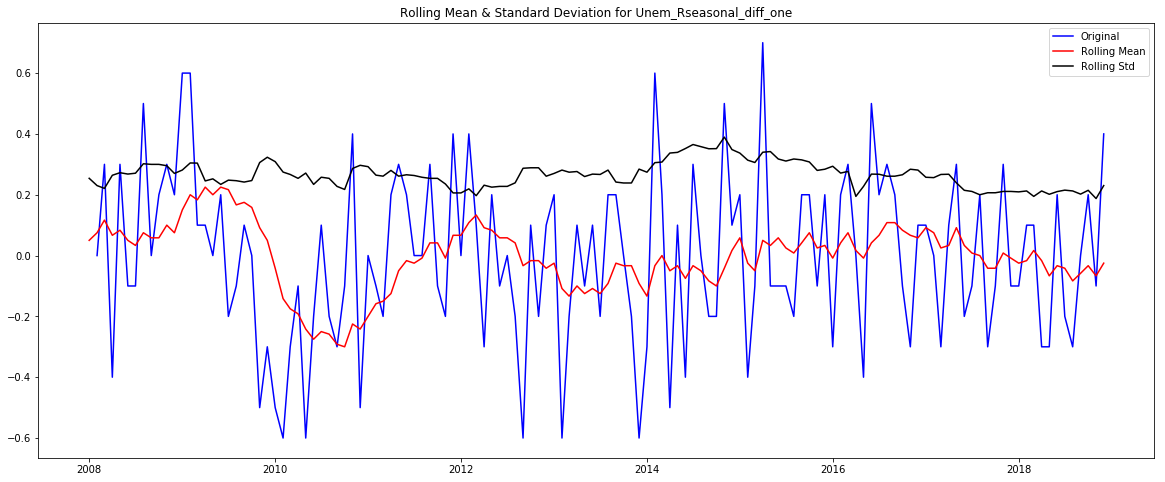

Results of Dickey-Fuller Test:
Test Statistic                  -4.513996
p-value                          0.000186
#Lags Used                      11.000000
Number of Observations Used    131.000000
Critical Value (1%)             -3.481282
Critical Value (5%)             -2.883868
Critical Value (10%)            -2.578677
dtype: float64


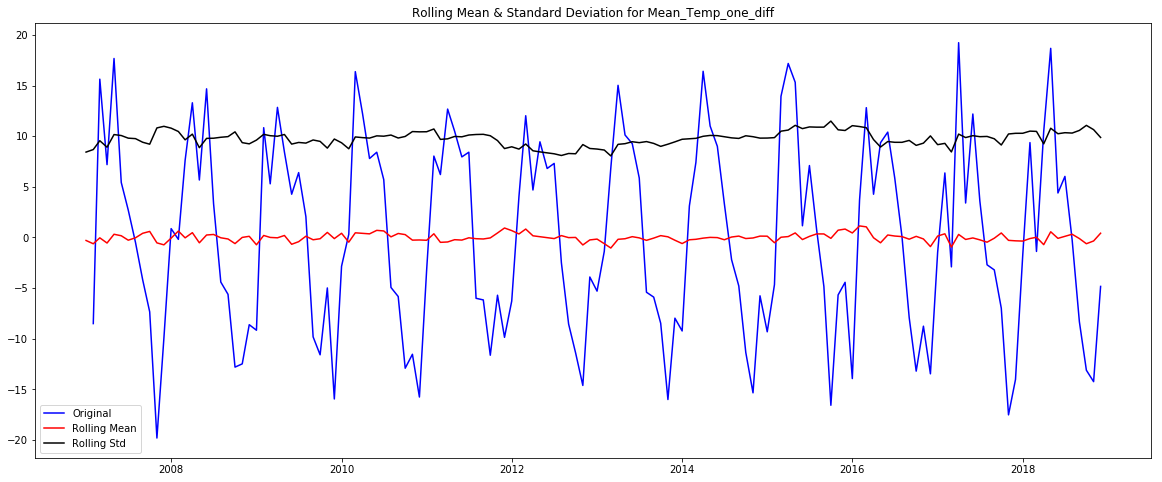

Results of Dickey-Fuller Test:
Test Statistic                -1.143310e+01
p-value                        6.444557e-21
#Lags Used                     9.000000e+00
Number of Observations Used    1.450000e+02
Critical Value (1%)           -3.476273e+00
Critical Value (5%)           -2.881688e+00
Critical Value (10%)          -2.577513e+00
dtype: float64


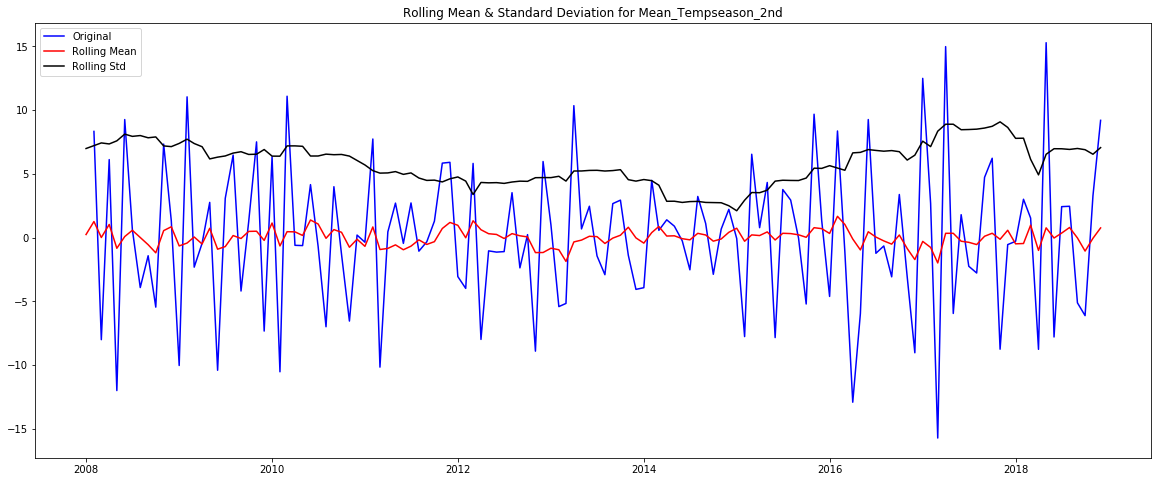

Results of Dickey-Fuller Test:
Test Statistic                  -5.032748
p-value                          0.000019
#Lags Used                      13.000000
Number of Observations Used    129.000000
Critical Value (1%)             -3.482088
Critical Value (5%)             -2.884219
Critical Value (10%)            -2.578864
dtype: float64


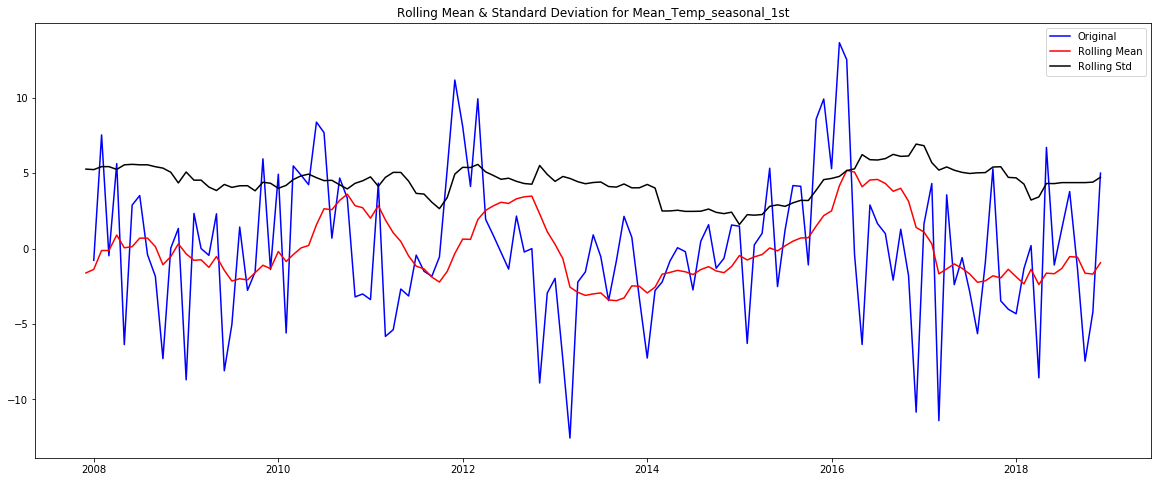

Results of Dickey-Fuller Test:
Test Statistic                  -3.794797
p-value                          0.002961
#Lags Used                      12.000000
Number of Observations Used    131.000000
Critical Value (1%)             -3.481282
Critical Value (5%)             -2.883868
Critical Value (10%)            -2.578677
dtype: float64


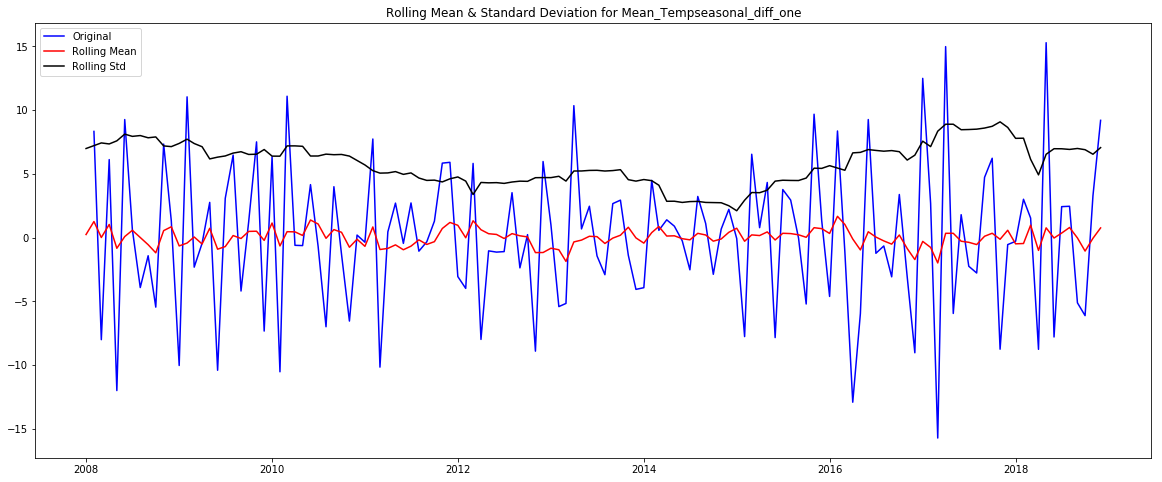

Results of Dickey-Fuller Test:
Test Statistic                  -5.032748
p-value                          0.000019
#Lags Used                      13.000000
Number of Observations Used    129.000000
Critical Value (1%)             -3.482088
Critical Value (5%)             -2.884219
Critical Value (10%)            -2.578864
dtype: float64


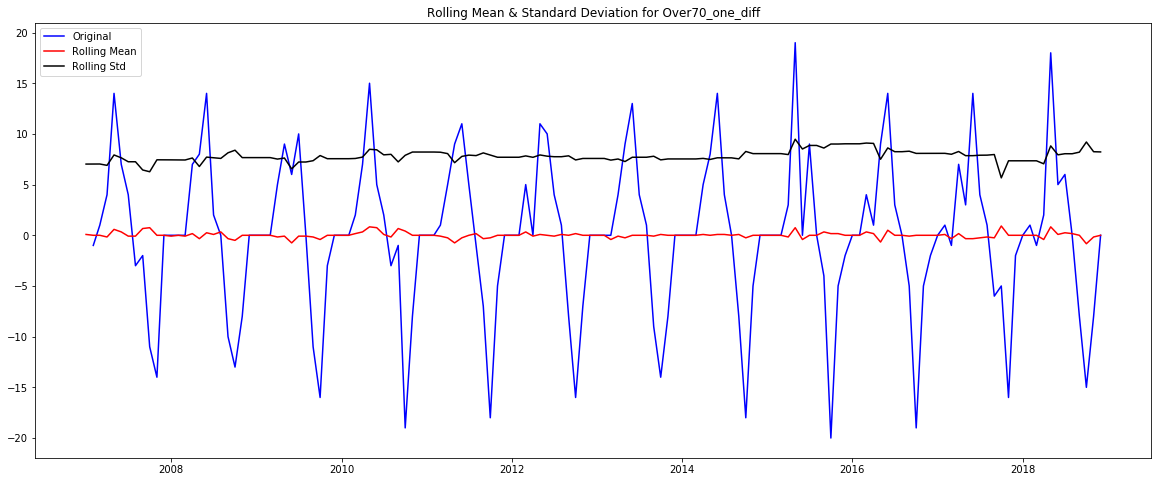

Results of Dickey-Fuller Test:
Test Statistic                -6.689512e+00
p-value                        4.143780e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.420000e+02
Critical Value (1%)           -3.477262e+00
Critical Value (5%)           -2.882118e+00
Critical Value (10%)          -2.577743e+00
dtype: float64


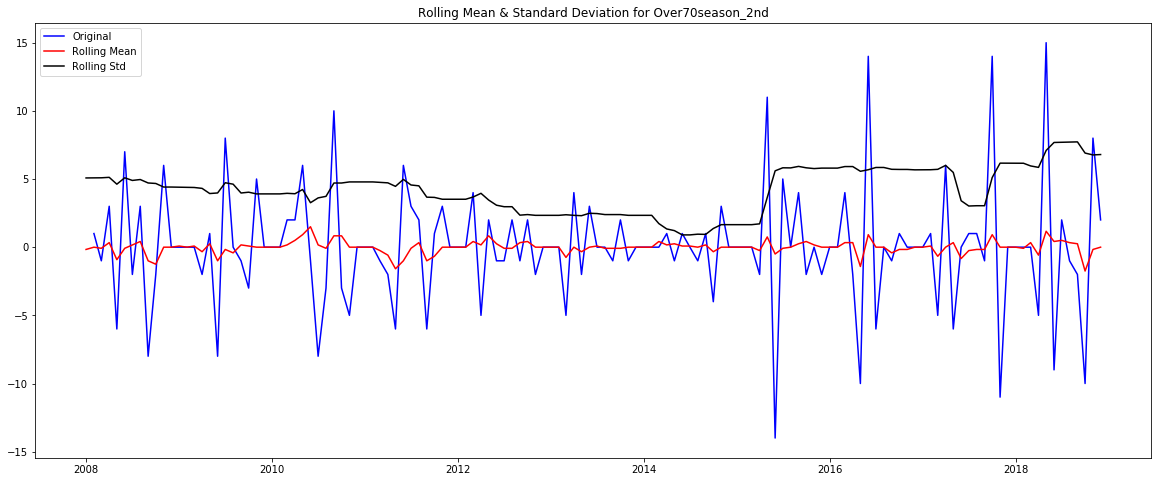

Results of Dickey-Fuller Test:
Test Statistic                -6.040288e+00
p-value                        1.351097e-07
#Lags Used                     1.400000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


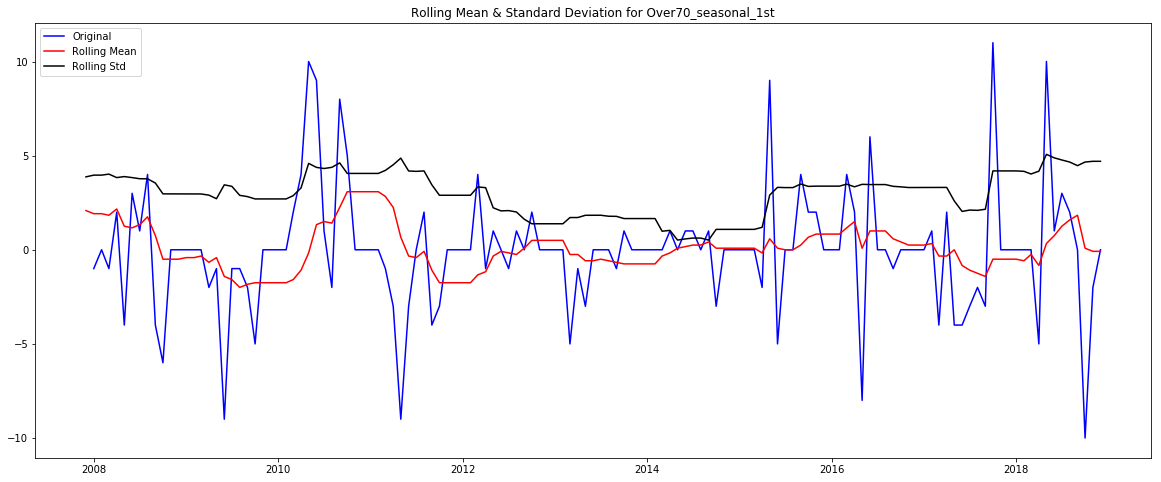

Results of Dickey-Fuller Test:
Test Statistic                -7.192085e+00
p-value                        2.488505e-10
#Lags Used                     1.100000e+01
Number of Observations Used    1.320000e+02
Critical Value (1%)           -3.480888e+00
Critical Value (5%)           -2.883697e+00
Critical Value (10%)          -2.578586e+00
dtype: float64


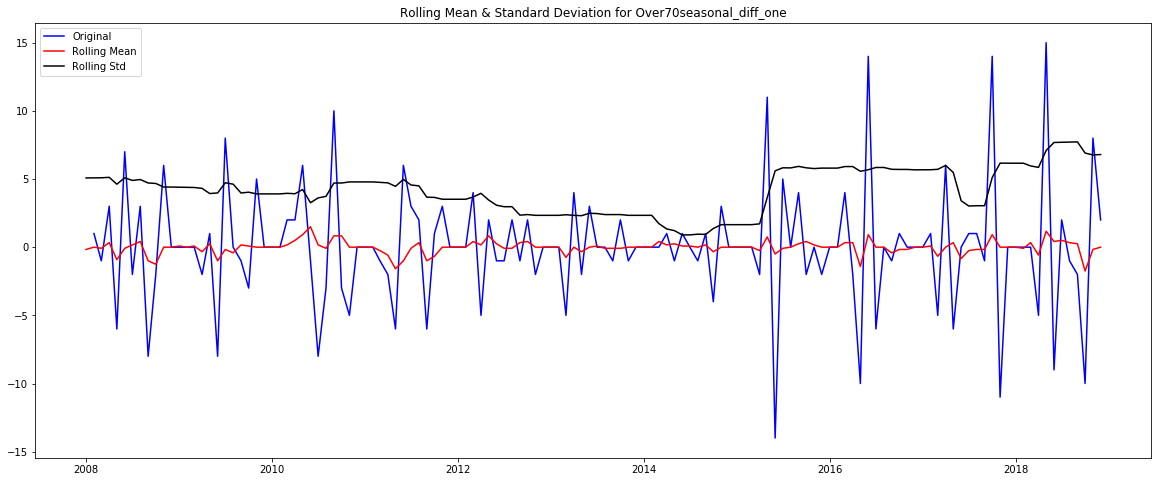

Results of Dickey-Fuller Test:
Test Statistic                -6.040288e+00
p-value                        1.351097e-07
#Lags Used                     1.400000e+01
Number of Observations Used    1.280000e+02
Critical Value (1%)           -3.482501e+00
Critical Value (5%)           -2.884398e+00
Critical Value (10%)          -2.578960e+00
dtype: float64


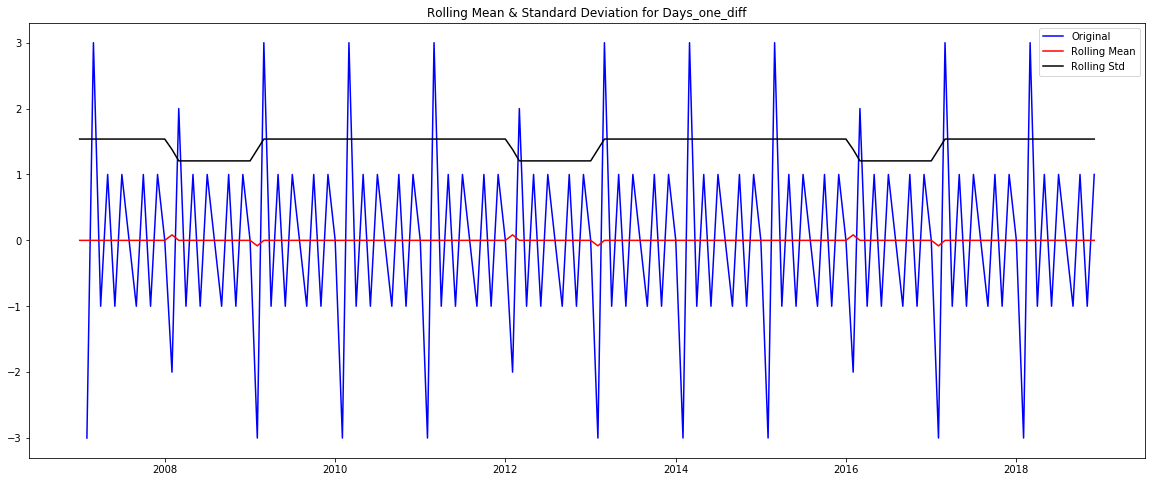

Results of Dickey-Fuller Test:
Test Statistic                 -31.795559
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    144.000000
Critical Value (1%)             -3.476598
Critical Value (5%)             -2.881829
Critical Value (10%)            -2.577589
dtype: float64


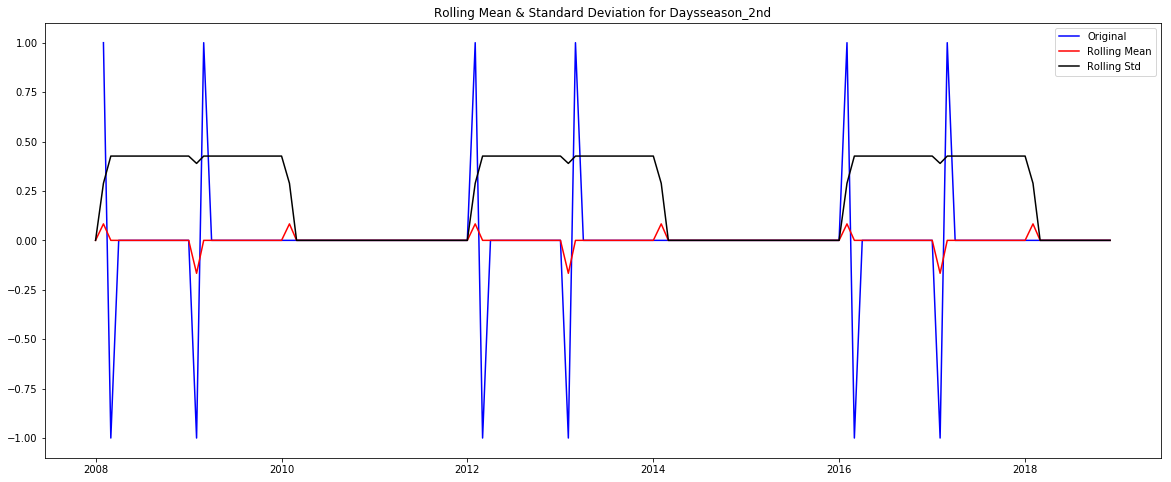

Results of Dickey-Fuller Test:
Test Statistic                  -5.093284
p-value                          0.000014
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


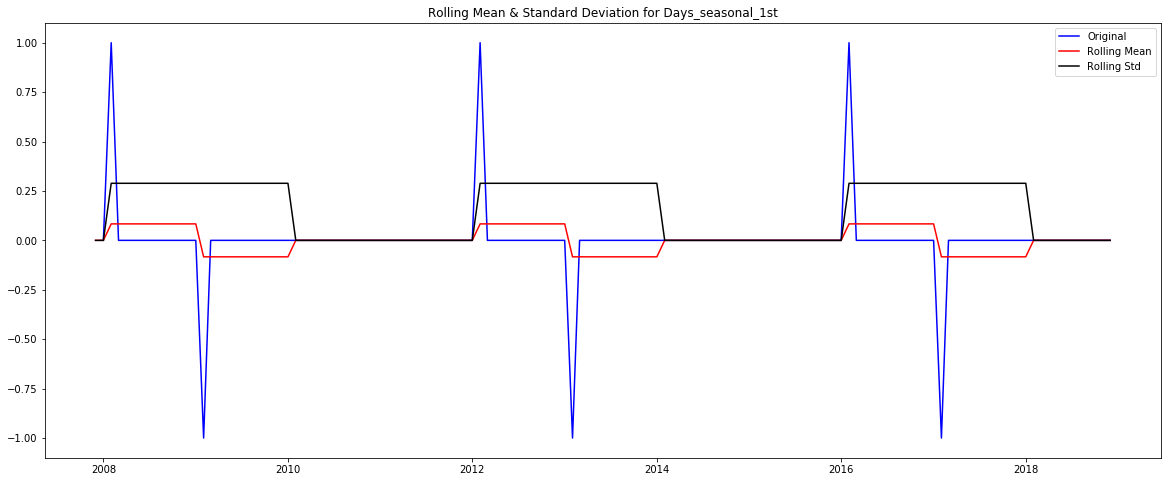

Results of Dickey-Fuller Test:
Test Statistic                  -5.454356
p-value                          0.000003
#Lags Used                      11.000000
Number of Observations Used    132.000000
Critical Value (1%)             -3.480888
Critical Value (5%)             -2.883697
Critical Value (10%)            -2.578586
dtype: float64


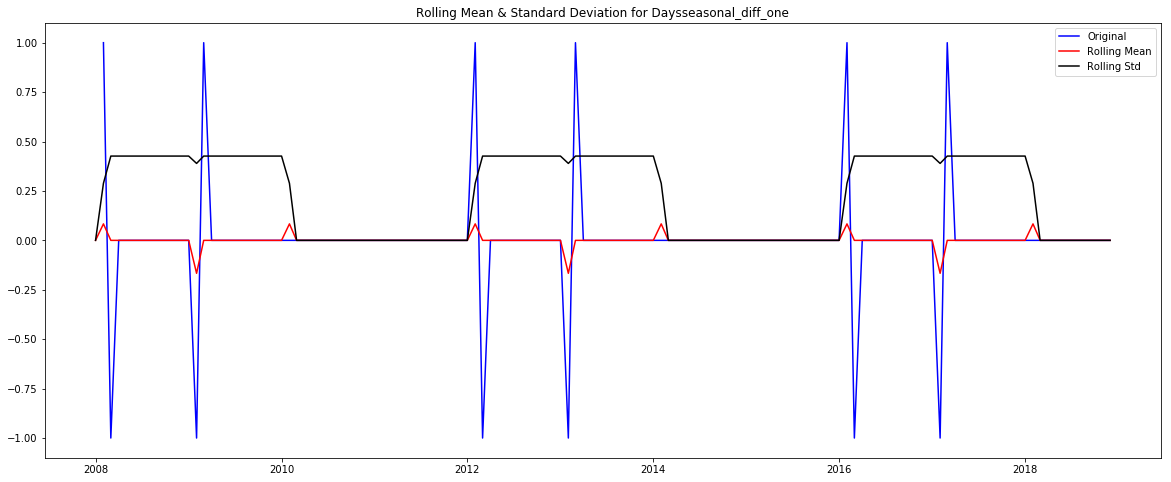

Results of Dickey-Fuller Test:
Test Statistic                  -5.093284
p-value                          0.000014
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [17]:
for col in x_crime.columns:
    test_stationarity(x_crime[col].dropna(), 12, col);